# Snake and Food Game
- The snake & food is a classic arcade game where the player controls a snake moving on a grid, attempting to eat food items while avoiding collisons. The game is simple in concept but requires strategic movement to maximize the snake's growth without running into walls or itself.

## Rule of the Game
- Setup
    - The game is played on an NXN grid.
    - The snake starts at an initial position with a small length
    - The player controls the movement of the snake using directional inputs (Up, Down, Left, Right)
- Game Mechanisam
    - The snake moves one step at a time in the chosen direction.
    - When the snake eats a food item, it grows in length, and a new food item spawns at a random position on the grid.
    - The game continues until the snake collides with the wall or itself, at which point the game ends.
- Game over conditions
    - The game ends if the snake collides with the boundary of the grid.
    - The game also ends if the snake collides with itself (i.e its own body)

## Interview Setting
### Point 1: Introducing and Vague problem statement
- Interviewer: Let's start with a basic statement. Design a Snake & Food game system.
- Candidate: Based on my understanding, the game follows these key mechanics:
    - A snake moves in a grid-based environment
    - The player controls the snake's movement direction
    - The snake grows when it eats food.
    - The game ends if the snake collides with a wall or itself.
- Interviewer: Yes, we're aligned with the requirements. Please continue

### Point 2: Clarifying requirements
- Interviewer: We want a simple system that
    - Supports a standard grid-based snake game with width x height dimensions.
    - Allows a layer to control the snake's movement
    - Supports food placement and consumption mechanics
    - Detects collisions (self-collision and wall collision)
    - Ensure proper movement and growth
    - Tracks the game score.
- Candidate: To clarify, the key requirements are:
    - A game grid of specific width and height
    - A single snake entiry, controlled by the player.
    - Food objects that appear at predefined positions on the grid.
    - Movement mechanics, updating the game state with each move.
    - Collision detection for both walls and snake's body
    - Scoring mechanism based on food consumption.
- Interviewer: That sounds perfect. Let's proceed.

### Point 3: Identifying key components
- Candidate: Now that we have the requirements clarified, let's identify the key components of our Snake Game system.
    - GameBoard
    - Snake
    - Food
    - SnakeGame: Controller
    - Pair

In [1]:
class GameBoard:
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def getWith(self):
        return self.width

    def getHeight(self):
        return self.height

In [2]:
class Pair:
    def __init__(self, row, col):
        self.row = row
        self.col = col

    def getRow(self):
        return self.row

    def getCol(self):
        return self.col

In [4]:
from collections import deque
class Snake:
    def __init__(self):
        # Snake body stored as dequeue of (row, col) tuples
        self.body = deque()
        # For O(1) collision check
        self.position = {}

        # Initilize snake at position [0, 0]
        initialPos = Pair(0, 0)
        self.body.appendleft(initialPos)
        self.position[initialPos] = True

    # Method for movement, growth, collision detection

In [5]:
class Food:
    def __init__(self, foodPosition: list[list[int]]):
        self.foodPosition = foodPosition
        self.currentFoodIndex = 0

    # Methods for food management

In [6]:
class SnakeGame:
    board: GameBoard
    snake: Snake
    food: Food
    score: int

    # Game inttilization and movement logic

### Point 4: Design Challenges
- Interviewer: What design challenges do we anticipate?
- Candidate: The key challenegs is desigining the game include:
    1. Efficient Snake Movement: Managing the snake's body segmanet during movement
    2. Collision Detection: Efficiently detecting when the snake collides with walls or itself.
    3. Food Management: Handling the predefined food positons and consumption.
    4. Game state Management: Tracking score and detecting game over conditions.
    5. Extensibility: Allowing for different movement strategies and game configurations.

### Point 5: Design Patterns Approach
- Interviewer: How would we approach these challenges to ensure the game functions smoothly?
- Candidate: To handle design challenges, I propose the followig design patterns:
    1. Strategy Pattern for Snake Movement:
        - This pattern allows us to define a family of algorithms for snake movement, encapsulate each one, make the interchangeable.
    2. Factory Pattern for Food Placement
        - Ensures different food types (normal, special, poisionous) should be dynamically generated without modiying exisiting code.
    3. Singleton Pattern for Board:
        - Ensures that only one instance of the game board exists:
    4. Observer Design Pattern for Score Updates:
        - Can be used to notify UI components of score changes or game over events

### Design Pattern
- 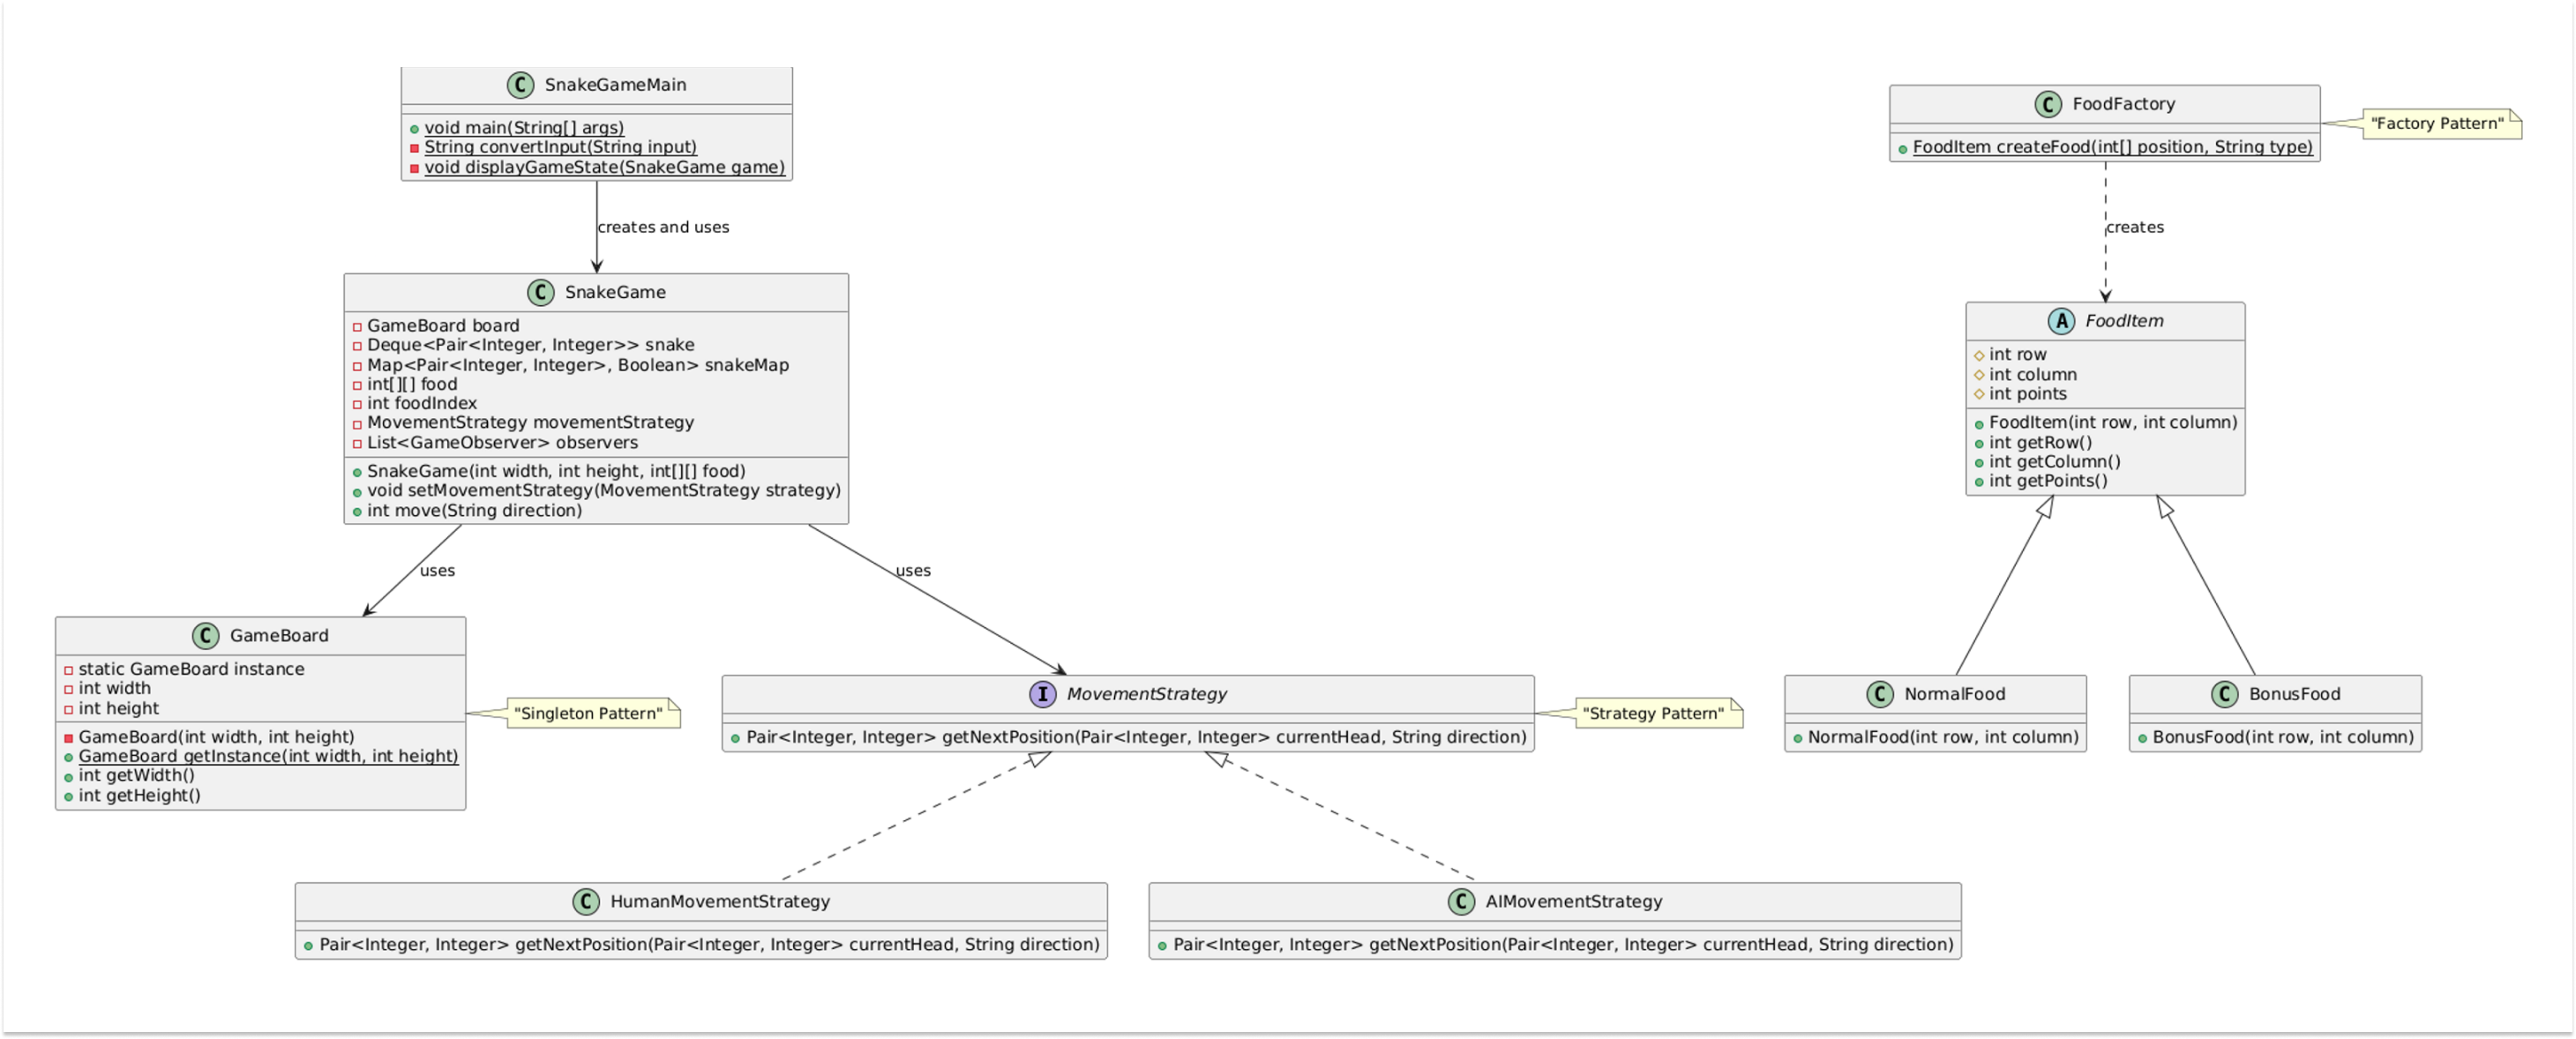

#### Strategy Pattern for Snake Movement

In [9]:
from abc import ABC, abstractmethod

# Movement Strategy interface
class MovementStrategy:
    @abstractmethod
    def getNextPosition(self, currentHead: Pair, direction: str)-> Pair:
        pass

# Human Player Movement Strategy
class HumanMovementStrategy(MovementStrategy):
    def getNextPosition(self, currentHead: Pair, direction: str)-> Pair:
        row = currentHead.getRow()
        col = currentHead.getCol()
        direction = direction.upper()
        if direction == 'U':
            return Pair(row-1, col)
        elif direction == 'D':
            return Pair(row+1, col)
        elif direction == 'L':
            return Pair(row, col-1)
        elif direction == 'R':
            return Pair(row, col+1)
        else:
            return currentHead

# AI Movement Strategy
class AIMovementStrategy(MovementStrategy):
    def getNextPosition(self, currentHead: Pair, direction: str)-> Pair:
        # AI logic to deterine next best move based on food position and obstacles
        # For simplicity, this could just implement a basic pathfinding algorithms
        # or even random movement that avoid obstacles
        return currentHead

#### Factory Pattern for Food Placement

In [12]:
from abc import ABC, abstractmethod

class FoodItem:
    def __init__(self, row: int, column: int):
        self.row = row
        self.column = column
        self.points = 0 # Default; subclasses should override

    # Getters and setters
    def getRow(self):
        return self.row
    def getCol(self):
        return self.col

    def getPoints(self):
        return self.points

# Concrete Class representing normal food with 1 point
class NormalFood(FoodItem):
    def __init__(self, row, column):
        super().__init__(row, column)
        self.points = 1

# special Food
class BonusFood(FoodItem):
    def __init__(self, row, column):
        super().__init__(row, column)
        self.points = 1

# Factory Class
class FoodFactory:
    def createFood(self, position: list[int], type: str):
        row, col = position
        if type == 'bonus':
            return BonusFood(row, col)
        return NormalFood(row, col)

#### Singelton Pattern for Game Board

In [16]:
class GameBoard:
    instance: None
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def getInstance(self, width, height):
        if self.instance == None:
            self.instance = GameBoard(width, height)
        return self.instance

    def getWidth(self):
        return self.width
    def getHeight(self):
        return self.height

In [15]:
class Node:
    def __init__(self, value):
        self.value = value   # (row, col)
        self.next = None


class LinkedList:
    def __init__(self):
        self.head = None  # front of snake
        self.tail = None  # end of snake
        self.size = 0

    # Equivalent to offerFirst in Java
    def addFirst(self, value):
        new_node = Node(value)
        new_node.next = self.head
        self.head = new_node

        if self.size == 0:
            self.tail = new_node

        self.size += 1

    # Equivalent to pollLast
    def removeLast(self):
        if self.size == 0:
            return None

        if self.size == 1:
            val = self.head.value
            self.head = None
            self.tail = None
            self.size = 0
            return val

        # Traverse to second last node
        curr = self.head
        while curr.next != self.tail:
            curr = curr.next

        val = self.tail.value
        curr.next = None
        self.tail = curr
        self.size -= 1
        return val

    def peekFirst(self):
        return self.head.value

    def peekLast(self):
        return self.tail.value


#### GameController

In [19]:
from collections import deque

class SnakeGame:
    def __init__(self, width: int, height: int, food: list[list[int]]):
        self.board = GameBoard().getInstance(width, height)
        self.food = food
        self.foodIndex = 0

        # Initialize snake
        self.snake = LinkedList()
        self.snakeMap = {}
        intialPos = Pair(0, 0)
        self.snake.append
        self.snakeMap[intialPos] = True

        # Default movement strategy
        self.movementStrategy = HumanMovementStrategy()

    # Set the movement strategy (Human or AI)
    def setMovementStrategy(self, strategy: MovementStrategy):
        self.movementStrategy = strategy

    # Returns the new score or -1 if game over
    def move(self, direction: str):
        
        # Get current head
        currentHead = self.snake.peekFirst()

        # Get the next position from strategy
        newHead = self.movementStrategy.getNextPosition(currentHead, direction)
        newHeadRow = newHead.getRow()
        newHeadColumn - newHead.getCol()

        # Check boundary conditions
        if newHeadRow < 0 or newHeadRow >= self.board.getHeight() or newHeadColumn < 0 or newHeadColumn >= self.board.getWidth():
            return -1
            
        # Get current tail for collision check
        currentTail = self.snake.peekLast()

        # Check if snake bites itself (excluding tail which will move away)
        if (newHead in self.snakeMap) and newHead != currentTail:
           return -1

        # Check if food
        ateFood = self.foodIndex < len(self.food) and self.food[self.foodIndex][0] == newHeadRow and self.food[self.foodIndex][1]

        if ateFood:
            self.foodIndex += 1
        else:
            removeTail = self.snake.removeTail()
            self.snakeMap.pop(removeTail, None)
            
        # Add new head
        self.snake.addFirst(newHead)
        self.snakeMap[newHead] = True
        # Caclulate ans and return score
        score = len(self.snake) -1
        return score
        

In [ ]:
if __name__ == '__main__':
    width = 20
    height = 15

    foodPosition = [(5, 5), (10, 8), (3, 12), (8, 17), (12, 3)]

    # Initialize the game
    game = SnakeGame(width, height, foodPosition)

    # Display game instructions
    print('------SNAKE GAME-------')
    print('Controls: W (Up), S (Down), A (Left), D (Right), Q (Quit)')
    print('Eat food to grow our snake and increase our score.')
    print("Don't hit the walls or bite ourself!")
    print("=======================")
    gameRunning = True
    score = 0
    while gameRunning:
        # Display current game state (we would have graphical respresentation of the board)
        displayGameState(game)
        # Get user input
        command = input('Enter move (W/A/S/D) or Q to quit').upper()
        # Handl quit command
        if command == 'Q':
            print(f'Game ended by player, final score: {score}')
            gameRunning = False
            continue
        # Conver WASD input to UDLR for game processing
        direction = ConvertInput(command)
        # skip invalid inputs
        if direction == '':
            print('Invalid input! Use W/A/S/D to move or Q to quit.')
            continue

        # Maek the move and get the new score
        score = game.move(direction)

        # Check for game over
        if score == -1:
            print('Game OVER! we hit a wall or bit ourself!')
            print(f'Final Score: {len(game.snake)}-1')
            gameRunning = False
        else:
            print(f'Score: {score}')

        print('Tanks for playing!')

    def ConvertInput(self, input: str):
        if input == 'W':
            return 'U'
        elif input == 'S':
            return 'D'
        elif input == 'A':
            return 'L'
        elif input == 'D':
            return 'R'
        else:
            return ''

    def displayGameState(self, game):
        print(f'nCurrent snake length: {len(game.snake)}')

- Interviewer: What makes your approach effective?
- Candidate: Here are the key strengths of my approach
    1. Simplicity: The design is kept minimal and straightforward, avoiding unnecessary complexity.
    2. Clarity: It's easy to understand, which makes it accessible for developers to implement and maintain.
    3. Efficiency: The implementation is direct and logical, ensuring smooth gameplay.
    4. Separation of concerns: Each component has a clear responsibility, enchancing modularity and ease of updates.

##### Extensibility
1. Extensible board size
- 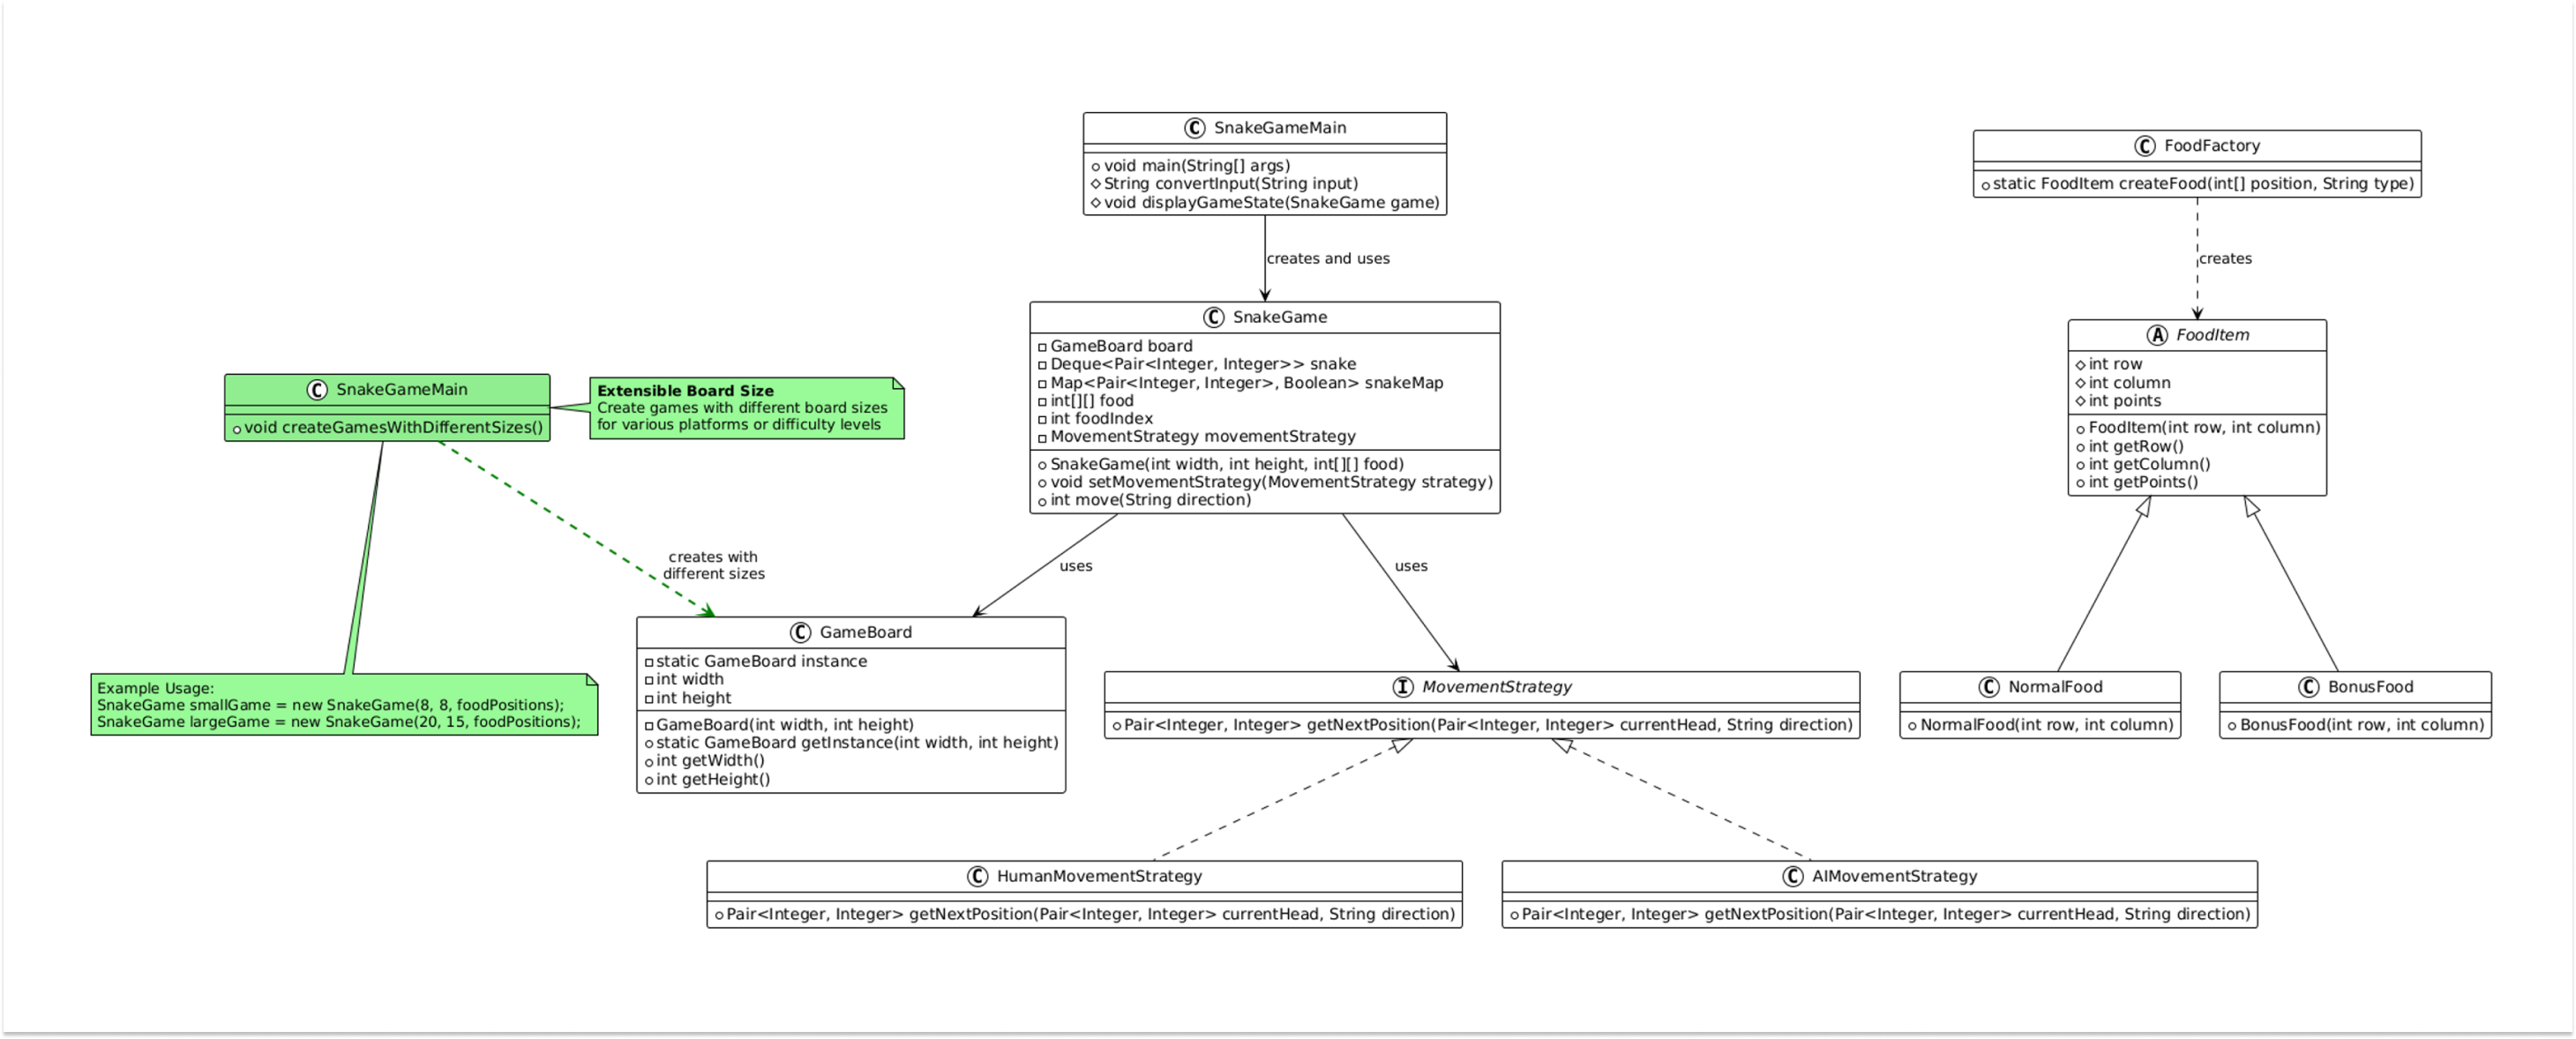
2. Observer patterns for Game Event Tracking
- 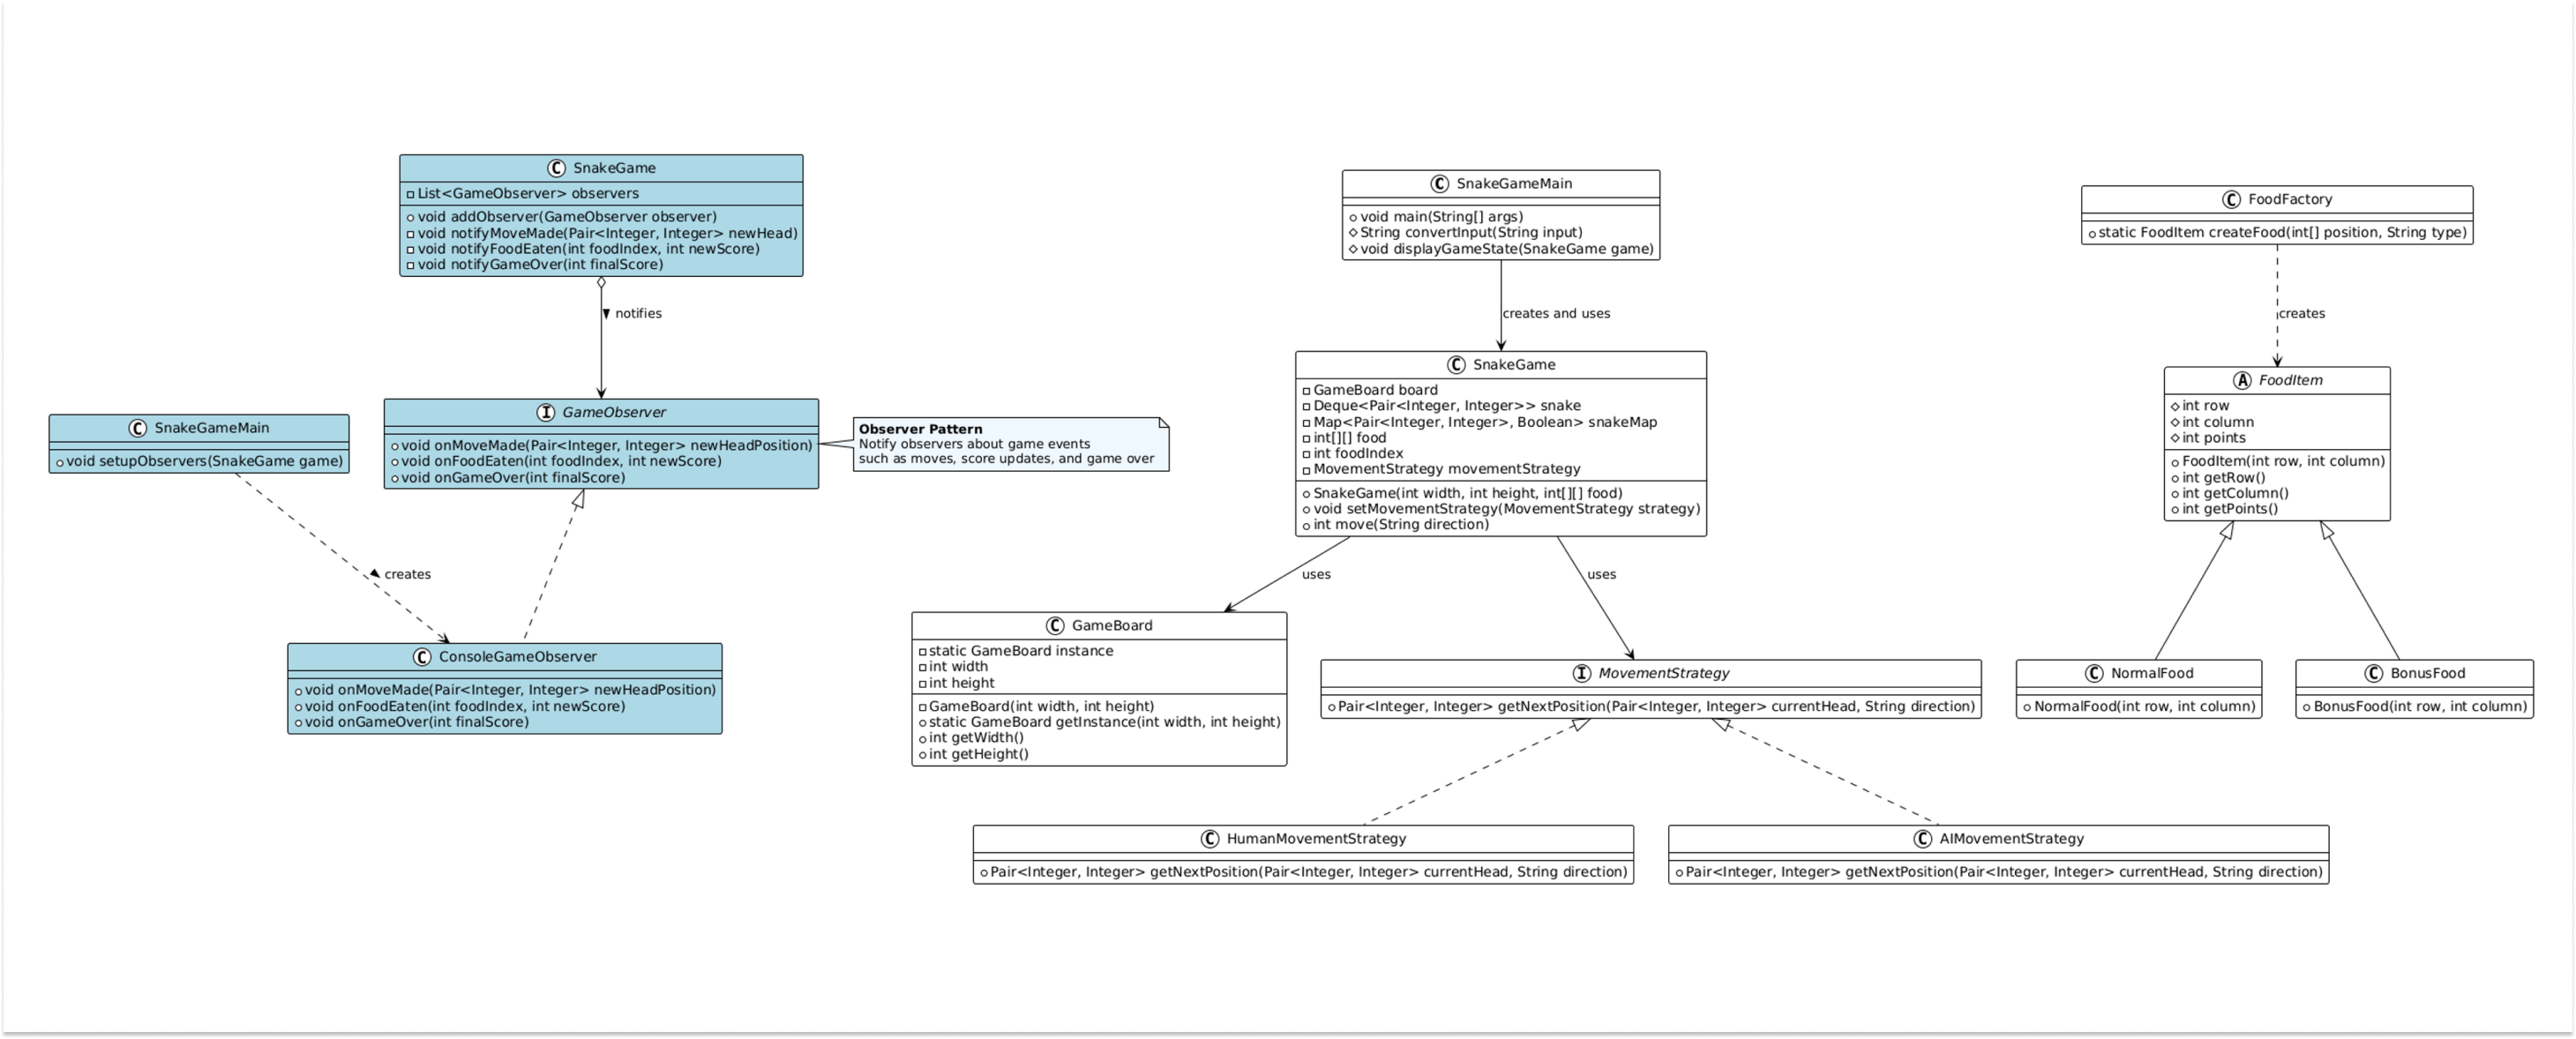
3. When the game has no Wall
- 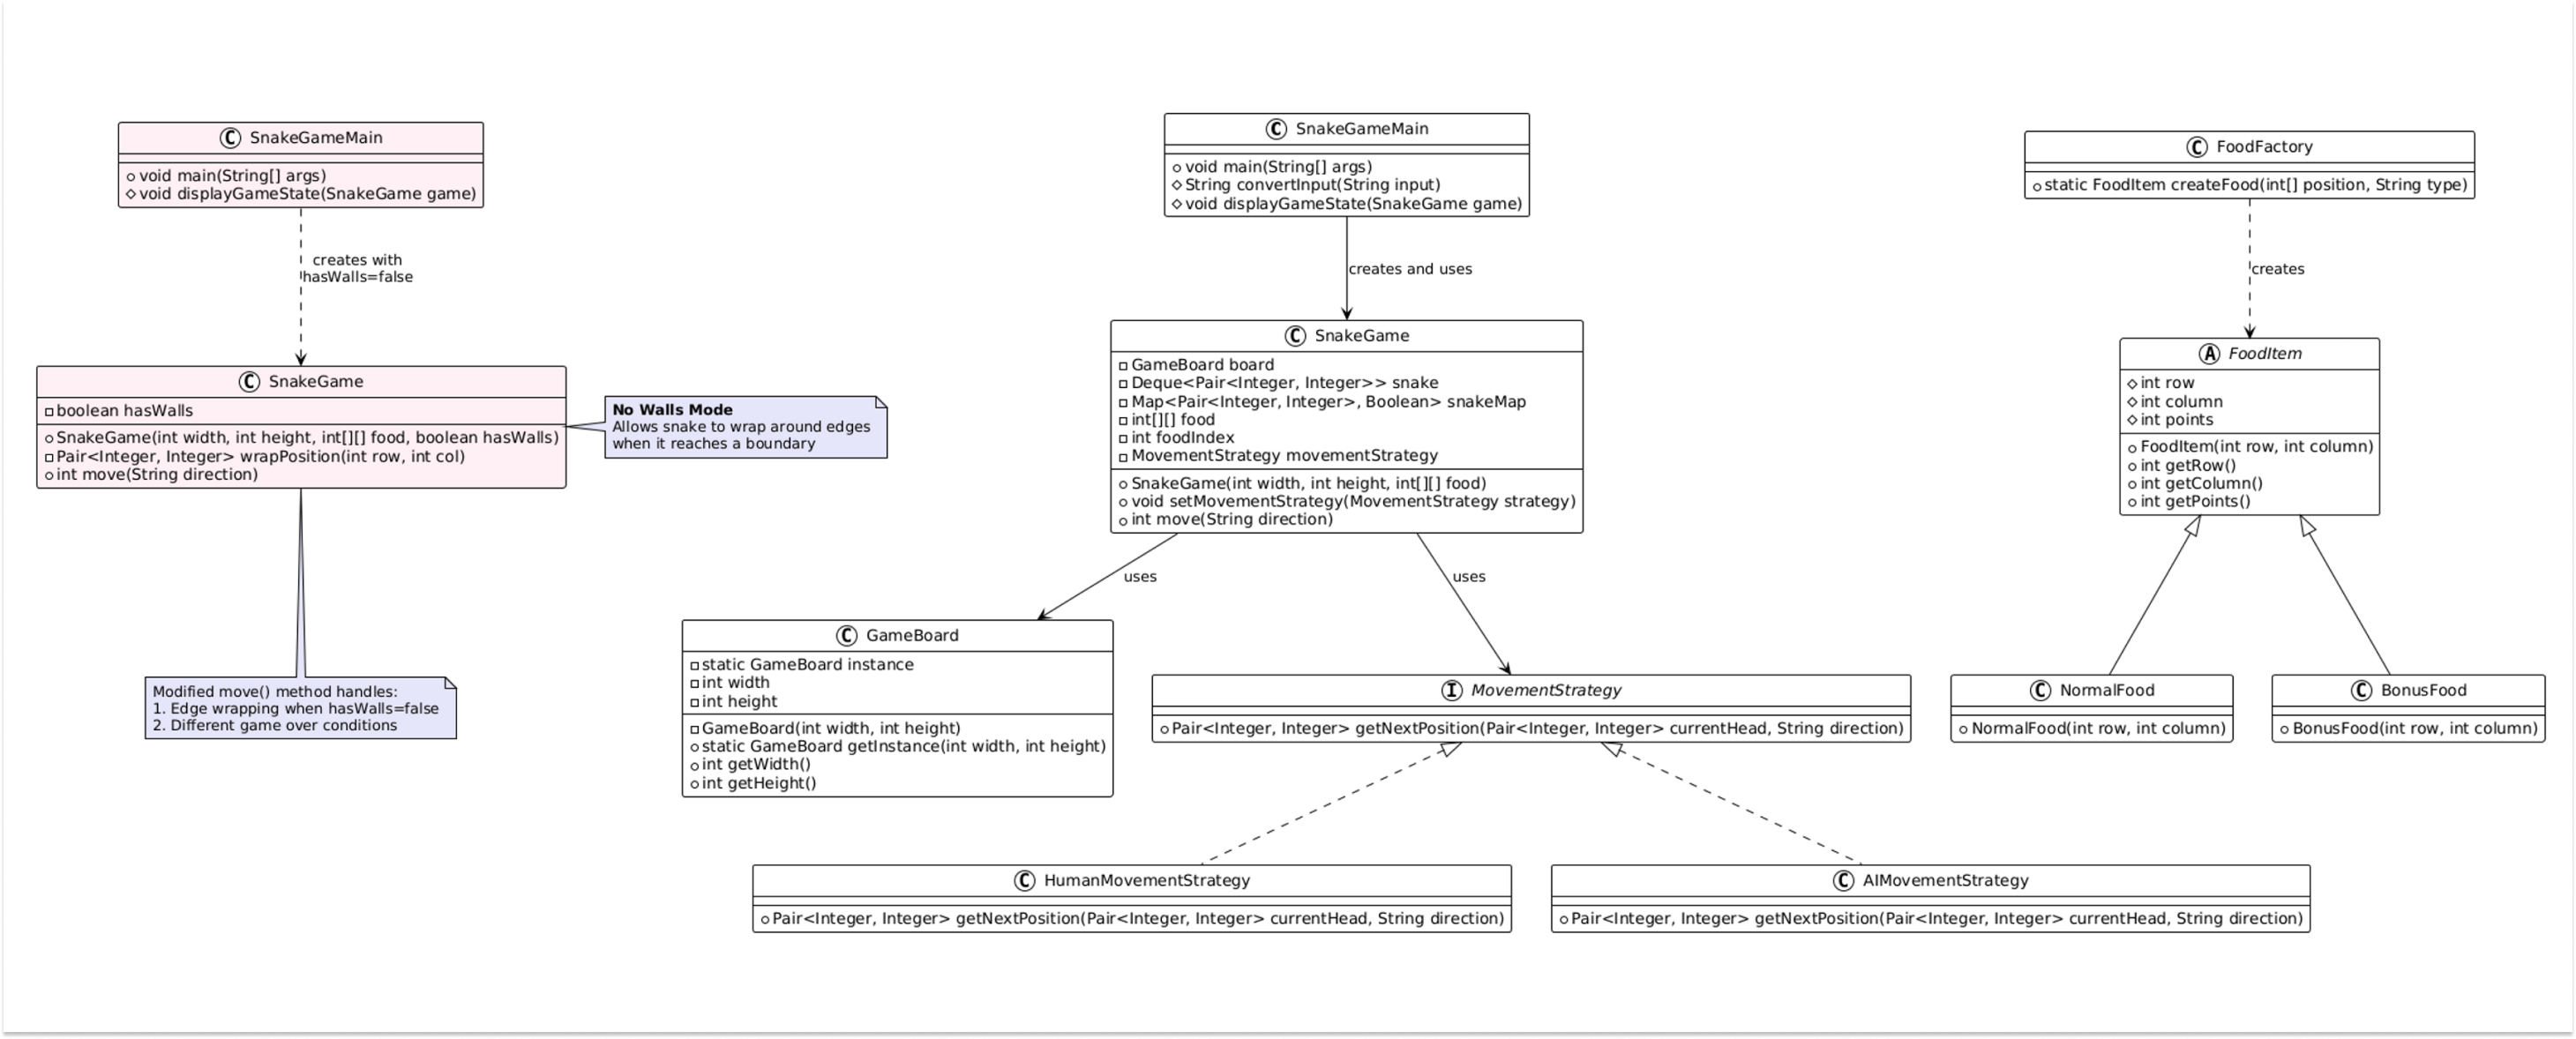